In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
from torch import optim
import matplotlib.pyplot as plt


In [3]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
df = pd.read_csv('cxdataset/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


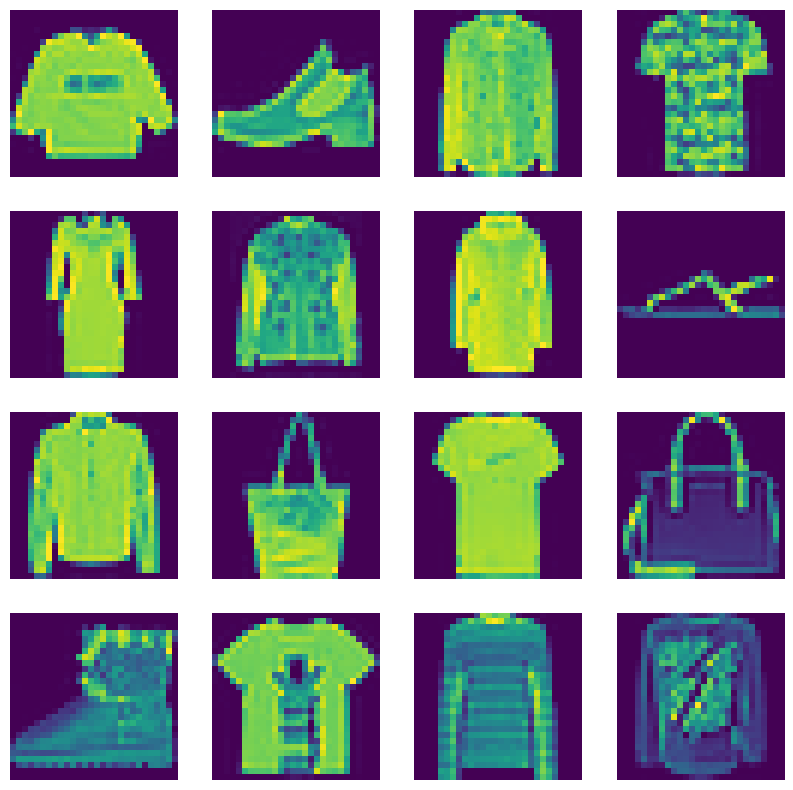

In [5]:
fig, axes = plt.subplots(4,4, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")

plt.show()

In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]], shape=(48000, 784))

In [10]:
class custD(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [11]:
train_dataset  = custD(X_train, y_train)
test_dataset = custD(X_test, y_test)

In [12]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [13]:
train_loader = DataLoader(train_dataset, batch_size= 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= 32, shuffle=True)

In [14]:
class NN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(num_features, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10),
                # nn.Softmax() no need cause it is implemeted by default in CE
            )
    def forward(self, x):
        return self.model(x)
    

In [15]:
lr = 0.1
epochs = 1000 

In [16]:
model = NN(X_train.shape[1])
model = model.to(device= device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= lr)

In [ ]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_fea, batch_lab in train_loader:
        batch_fea, batch_lab = batch_fea.to(device), batch_lab.to(device)

        outputs = model(batch_fea)
        
        loss = criterion(outputs, batch_lab)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        total_epoch_loss += loss.item()

    avg_epoch_loss = total_epoch_loss / len(train_loader)
    print(f"Epoch : {epoch+1}  : Loss {avg_epoch_loss}")

Epoch : 1  : Loss 0.6351939869821072
Epoch : 2  : Loss 0.4295223880211512
Epoch : 3  : Loss 0.3869724438364307


In [ ]:
model.eval()

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.inference_mode():

    for batch_fea, batch_lab in test_loader:
        batch_fea, batch_lab = batch_fea.to(device), batch_lab.to(device)
        
        outputs = model(batch_fea)

        _, predicted = torch.max(outputs, 1)

        total += batch_lab.shape[0]

        correct += (predicted == batch_lab).sum().item()

    print(correct/total) # it is overfitting right nowww

0.8366666666666667
